### Import relevant libraries

In [12]:
from __future__ import print_function
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score

### Get the data

In [4]:
#download the dataset
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"

#read the input data
input_data = pd.read_csv(path)

print("There are "+str(len(input_data)) +" in the credit card input data set")
print("There are "+str(len(input_data.columns)) + "variables in the credit card input data set")

There are 284807 in the credit card input data set
There are 31 in the credit card input data set


### Data Analysis

In [5]:
#Display first few rows in data set
input_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
#Inflate the original data 10 times to simulate the case to a original situation
n_replicas = 10
big_raw_data = pd.DataFrame(np.repeat(input_data.values, n_replicas, axis=0), columns=input_data.columns)

print("There are "+str(len(big_raw_data)) +" in the credit card inflated dataset")
print("There are "+str(len(big_raw_data.columns)) + "variables in the credit card inflated dataset")

#Display first few rows in data set
big_raw_data.head()

There are 2848070 in the credit card inflated dataset
There are 31variables in the credit card inflated dataset


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


In [9]:
#Target label representation
#1: fraud
#0: no_fraud

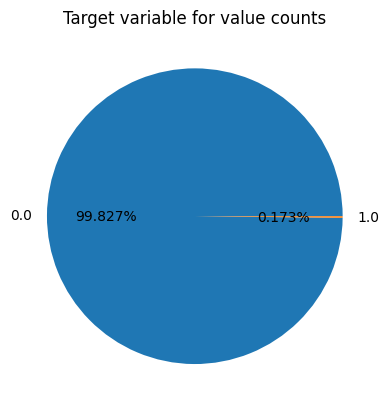

In [11]:
#Get the set of distinc classes
labels = big_raw_data.Class.unique()

#Get the count of each classes
sizes = big_raw_data.Class.value_counts().values

#Plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title("Target variable for value counts")
plt.show()

### Analysis the amount

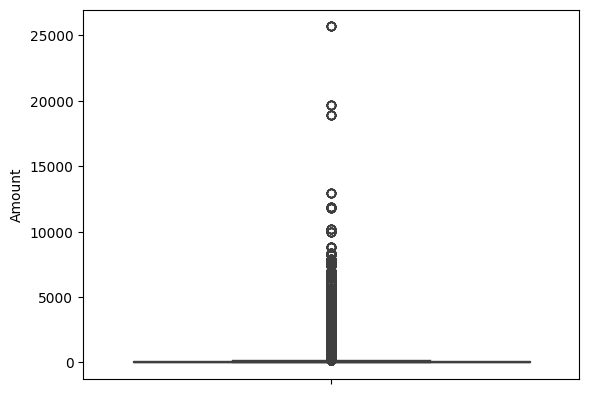

In [17]:
#Analysis the amount in box plot
sns.boxplot(big_raw_data.Amount)
plt.show()

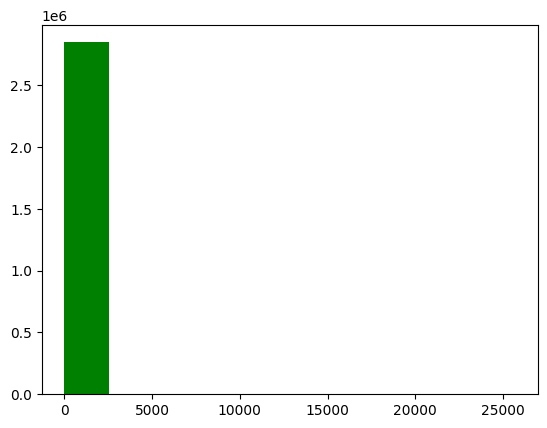

In [21]:
#Analysis the amount in histogram
plt.hist(big_raw_data.Amount.values, histtype='bar', facecolor='g')
plt.show()

In [22]:
big_raw_data.Amount.describe()

count    2.848070e+06
mean     8.834962e+01
std      2.501197e+02
min      0.000000e+00
25%      5.600000e+00
50%      2.200000e+01
75%      7.717000e+01
max      2.569116e+04
Name: Amount, dtype: float64

In [24]:
#get the 90% of the transcation
print("Minimum amount value is ", np.min(big_raw_data.Amount.values))
print("Maximum amount value is ", np.max(big_raw_data.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(big_raw_data.Amount.values, 90))

Minimum amount value is  0.0
Maximum amount value is  25691.16
90% of the transactions have an amount less or equal than  203.0


### Data Preprocessing

In [25]:
#Split the feature variable and target variable
X = big_raw_data.iloc[:,1:30] #exclude the time variable of the dataset
y = big_raw_data.iloc[:,30]

#Standardizing the features by removing the mean and scalling the unit variance
X_standard_scale = StandardScaler().fit_transform(X)

#Normalizing the dataset
X_normalize = normalize(X_standard_scale, norm = 'l1')

#Print the shape of the features matrix and label vector
print('feature_variable shape=', X_normalize.shape, 'target_variable shape=', y.shape)


feature_variable shape= (2848070, 29) target_variable shape= (2848070,)


### Train and Test split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_normalize, y, test_size = 0.3, random_state = 42, stratify = y)
print('X_train.shape=',X_train.shape, 'y_train.shape=',y_train.shape)
print('X_test.shape=',X_test.shape, 'y_train=',y_train.shape)

X_train.shape= (1993649, 29) y_train.shape= (1993649,)
X_test.shape= (854421, 29) y_train= (1993649,)


### Build a Decision Tree Classifier model with Scikit-Learn

In [32]:
#Compute the sample wights to be used as input to the train routine so that
#It takes into account the class imbalance in this dataset
w_train = compute_sample_weight('balanced', y_train)

#Import the Decision Tree Classifier Model from scikit-learn
from sklearn.tree import DecisionTreeClassifier

#For reproducible output across mutiple function calls, set random_state to a given intiger value
decision_tree = DecisionTreeClassifier(max_depth=4, random_state=35)

#Train a decision tree classifier using scikit-learn
t0 = time.time()
decision_tree.fit(X_train, y_train, sample_weight=w_train)
scikitlearn_training_time = time.time() - t0
print("scikit-learn decision tree training time(s): {0:.5f}".format(scikitlearn_training_time))

scikit-learn decision tree training time(s): 55.79647


### Build a Decision Tree Classifier model with Snap ML

In [33]:
#Import the Decision Tree Classifier Model from snap ml
from snapml import DecisionTreeClassifier

#to set the number of CPU threads used at a training time, set the n_jobs patameter
snapml_decision_tree = DecisionTreeClassifier(max_depth=4, random_state=35, n_jobs=4)

#Train a decision tree classifier using snapml
t0 = time.time()
snapml_decision_tree.fit(X_train, y_train, sample_weight=w_train)
snapml_training_time = time.time() - t0
print("snap ml decision tree training time(s): {0:.5f}".format(snapml_training_time))

snap ml decision tree training time(s): 2.91432


### Evaluate the Scikit-Learn and Snap ML Decision Tree Classifier Models

In [34]:
#snap ml vs scikit learn training speedup
training_speedup = scikitlearn_training_time/snapml_training_time
print("snap ml vs scikit learn speedup: {0:.2f}x ".format(training_speedup))

#run inference and compute the probabilities of the test samples
sklearn_pred = decision_tree.predict_proba(X_test)[:,1]

#evaluate the compute area under the receiver operating characetrisitics for sklearn
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print('Scikit learn ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))

#run inference and compute the probabilities of the test samples
snapml_pred = snapml_decision_tree.predict_proba(X_test)[:,1]

#evaluate the compute area under the receiver operating characetrisitics for snapml
snapml_roc_auc = roc_auc_score(y_test, snapml_pred)
print('Snapml learn ROC-AUC score : {0:.3f}'.format(snapml_roc_auc))

snap ml vs scikit learn speedup: 19.15x 
Scikit learn ROC-AUC score : 0.966
Snapml learn ROC-AUC score : 0.966


### Build a Support Vector Machine model with Scikit-Learn

In [35]:
#import the linear Support Vector Machine (SVM) model from scikit-learn
from sklearn.svm import LinearSVC

#instantiate a scikit-learn SVM model
sklearn_svm = LinearSVC(class_weight='balanced', random_state=31, loss='hinge', fit_intercept = False) 

#train a linear support vector machine learning model using scikit-learn
t0 = time.time()
sklearn_svm.fit(X_train, y_train)
sklearn_svm_time = time.time() - t0
print("sklearn training time(s): {0:.2f}".format(sklearn_svm_time))

C:\Users\shihamf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


sklearn training time(s): 114.69


C:\Users\shihamf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Build a Support Vector Machine model with Snap ML

In [36]:
#import the linear Support Vector Machine (SVM) model from scikit-learn
from snapml import SupportVectorMachine

#instantiate a snapml SVM model
snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, n_jobs=4, fit_intercept = False) 

#train a linear support vector machine learning model using scikit-learn
t0 = time.time()
snapml_svm.fit(X_train, y_train)
snapml_svm_time = time.time() - t0
print("snapml training time(s): {0:.2f}".format(snapml_svm_time))

snapml training time(s): 19.16


### Evaluate the Scikit learn and Snap ML Support Vector Machine Learning Models

In [38]:
#compute the snap ml vs scikit training speedup
training_speedup = sklearn_svm_time/snapml_svm_time
print("Decision tree classifier snap ml vs scikit learn speed up: {0:.2f}x ".format(training_speedup))

#get the confidence score of the test sklearn ampples
sklearn_svm_pred = sklearn_svm.decision_function(X_test)

#evaluate the accuracy on test
acc_sklearn_svm = roc_auc_score(y_test, sklearn_svm_pred)
print("Accuracy of the sklearn SVM model is {0:.3f}".format(acc_sklearn_svm))

#get the confoidence score of the test snapml samples
snapml_svm_pred = snapml_svm.decision_function(X_test)

#evaluate the accuracy on test
acc_snapml_svm = roc_auc_score(y_test, snapml_svm_pred)
print("Accuracy of the snapml SVM model is {0:.3f}".format(acc_snapml_svm))



Decision tree classifier snap ml vs scikit learn speed up: 5.98x 
Accuracy of the sklearn SVM model is 0.984
Accuracy of the snapml SVM model is 0.985
